# Pytorch

Pytorch es una biblioteca creada por Facebook para hacer "programación diferencial".

Una biblioteca de programación diferencial es un sistema en donde haces operaciones y el sistema se "acuerda" de todas las operaciones que hiciste, para poder sacar derivadas.

Por ejemplo, digamos que tienes `a = 5` y `b = 3` y yo le pregunto a python `a*b`. Sin problema me contestará `15`, pero una vez que hace la operación, se olvida de donde venía ese `15`. En programación diferencial no: se acuerda  de que tenía dos variables y que las multipliqué para obtener el 15, así que si luego le pregunto a pytorch por la derivada de `a*b` con respecto a `a` y con respecto a `b`, lo puede sacar (evaluado en `(5,3)`, claro!).

Además, pytorch hace álgebra lineal, claro, y programación diferencial con álgebra lineal.

La unidad básica en pytorch son los *tensores*, que son la generalización de número, vector, matriz, etc. Si hay físicos en la audiencia, me disculpo de antemano (de parte de toda la comunidad de deep learning) por llamarle tensores a esas cosas :)

Algunas notas:

- pytorch está pensado para hacer redes neuronales, pero no es necesario querer hacer redes neuronales para usarlo!
- pytorch es extremadamente rápido. En realidad cuando le dices que multiplique matrices o lo que sea, llama a código hiper-eficiente de C++.
- Puedes usar pytorch directamente en C++, pero no ganas mucho si tus cuellos de botella son las operaciones en sí que estás haciendo.
- Puedes usar pytorch en la GPU, lo cual hace mucho más rápidas las operaciones. Incluso puedes usar muchas GPUs, o un cluster de computadoras cada una con sus GPUs, etc.
- Trae muchas funciones de ayuda para leer imágenes/audio/texto, etc. etc. Es una biblioteca muy completa. Nosotros nos enfocaremos exclusivamente a la manipulación de tensores.

In [1]:
import torch

In [ ]:
torch.cuda.is_available()

In [ ]:
a = torch.tensor([5.])

In [ ]:
a

In [ ]:
b = torch.tensor([3.])

In [ ]:
a*b

Ahora, a esos tensores no les dije que necesitaban gradientes, así que no sabe sacar derivadas ni nada. Para poder sacar derivadas, necesito decirlo a la hora de crearlos.

In [ ]:
a = torch.tensor([5.],requires_grad=True)

In [ ]:
a

In [ ]:
b = torch.tensor([3.],requires_grad=True)

In [ ]:
a*b

In [ ]:
m1 = a*b
m2 = a+b
m1.backward() # esto significa "saca derivadas de a*b con respecto a todo"
m2.backward()

In [ ]:
a

In [ ]:
a.grad # eso fue la derivada parcial de (a*b) con respecto a, que efectivamente es 3!

In [ ]:
b.grad

Ahora, torch puede trabajar con tensores de todo tipo (enteros, boleanos, etc. etc.), pero claro, solo puede sacar derivadas de los floats.

In [ ]:
torch.tensor([1,2,3,4])

In [ ]:
A = torch.tensor([[1.,2,3,4],[5,6,7,8]])

In [ ]:
A

## Propiedades

In [ ]:
A.shape

In [ ]:
A.dtype

In [ ]:
A.device

In [ ]:
A=A.to('cuda')

In [ ]:
A.device

## Operaciones

In [ ]:
A

In [ ]:
10*A

In [ ]:
A-A

In [ ]:
A/5

In [ ]:
A//5

In [ ]:
A**2

In [ ]:
torch.sin(A)

In [ ]:
A.T

In [ ]:
A*A

In [ ]:
A@A

In [ ]:
A@A.T

In [ ]:
torch.arange(10)

In [ ]:
torch.arange(10,20,2)

## Generar aleatorios

In [ ]:
A = torch.rand(3,5,5); A

In [ ]:
A=A.to('cuda')

In [ ]:
A

In [ ]:
B = torch.rand(3,5,5); B

In [ ]:
A+B

In [ ]:
B=B.to(A.device)

In [ ]:
A.device

In [ ]:
B.device

In [ ]:
A+B

In [ ]:
B=torch.randn(4,3,2) # normal con media 0 y desviación estándar 1

In [ ]:
B

## Indizar

In [ ]:
A = torch.rand(4,4)

In [ ]:
A.shape

In [ ]:
A

In [ ]:
A[1]

In [ ]:
A[0,0,0]

In [ ]:
A[:,0]

In [ ]:
A[1,:] # equivalente a A[1], claro

In [ ]:
A[1]

In [ ]:
A

In [ ]:
A[1:3,:2]

In [ ]:
A[:,None,:]

In [ ]:
A = A[:,None,:,None,None,None]

In [ ]:
A.shape

In [ ]:
A=A.squeeze()

In [ ]:
A.shape

In [ ]:
torch.rand(1,10)

In [ ]:
torch.rand(10,1).squeeze()

## Broadcasting

Una cosa súper padre y súper confusa a veces es el concepto de broadcasting. Si una operación entre tensores no se puede hacer porque las dimensiones no corresponden, a veces se puede hacer: aumentando dimensiones de tamaño "1" (al inicio) y "repitiendo". Vamos a ver un ejemplo.

In [13]:
A = torch.rand(2,4); A

tensor([[0.8347, 0.7049, 0.5797, 0.2114],
        [0.8835, 0.5828, 0.0763, 0.8759]])

In [14]:
A + 3

tensor([[3.8347, 3.7049, 3.5797, 3.2114],
        [3.8835, 3.5828, 3.0763, 3.8759]])

In [15]:
A + torch.tensor([3])

tensor([[3.8347, 3.7049, 3.5797, 3.2114],
        [3.8835, 3.5828, 3.0763, 3.8759]])

In [16]:
torch.tensor([3]).shape

torch.Size([1])

In [17]:
A.shape

torch.Size([2, 4])

In [18]:
A + torch.tensor([10,20,30,40])

tensor([[10.8347, 20.7049, 30.5797, 40.2114],
        [10.8835, 20.5828, 30.0763, 40.8759]])

In [19]:
torch.tensor([10,20,30,40]).shape

torch.Size([4])

In [20]:
A.shape

torch.Size([2, 4])

### ¿Cómo funciona?

Las reglas son así (digamos que las dimensiones son (4,2,1,6) y (2,5,6).)

1. Se alinean las dimensiones de los vectores A LA DERECHA 
```txt
4 2 1 6
  2 5 6
```

2. Se completa con 1's aquellos que les falte algo.
```txt
4 2 1 6
1 2 5 6
```

3. Para cada dimensión, si una de ellas es un uno, entonces se convierte a la otra dimensión, repitiendo.
```txt
4 2 5 6
4 2 5 6
```

4. Si alguna dimensión no coincide, hay error. 

Ejercicio: Súmale 10 al primer renglón y 20 al segundo renglón. Escribe poquito.

In [29]:
A = torch.rand((2,4))

In [30]:
A

tensor([[0.5106, 0.7778, 0.6995, 0.4762],
        [0.6335, 0.2489, 0.8834, 0.9223]])

In [21]:
A + torch.tensor([10,20])[:,None]

tensor([[10.8347, 10.7049, 10.5797, 10.2114],
        [20.8835, 20.5828, 20.0763, 20.8759]])

Ejercicio: Crea un tensor de 10x5x8 (e.g. 10 matrices de 5x8) y luego multiplica la primera matriz por 0, luego la segunda por 1, etc.

### Operaciones sobre un tensor

In [67]:
A = torch.rand(5,3); A

tensor([[0.8308, 0.5477, 0.5155],
        [0.2359, 0.1740, 0.4947],
        [0.1293, 0.0449, 0.7662],
        [0.8992, 0.1264, 0.1011],
        [0.8420, 0.8761, 0.1049]])

In [68]:
torch.sum(A)

tensor(6.6888)

In [69]:
torch.sum(A,dim=0)

tensor([2.9373, 1.7691, 1.9825])

In [70]:
torch.sum(A,dim=1)

tensor([1.8940, 0.9046, 0.9404, 1.1267, 1.8231])

## Máscaras

In [31]:
A

tensor([[0.5106, 0.7778, 0.6995, 0.4762],
        [0.6335, 0.2489, 0.8834, 0.9223]])

In [32]:
(A < 0.5)

tensor([[False, False, False,  True],
        [False,  True, False, False]])

In [33]:
A[A<0.5]

tensor([0.4762, 0.2489])

In [37]:
A = torch.randint(0,10,size=(5,5))

In [39]:
A

tensor([[5, 1, 0, 4, 0],
        [1, 0, 5, 2, 5],
        [8, 9, 0, 7, 8],
        [8, 8, 2, 7, 5],
        [5, 0, 8, 9, 2]])

In [38]:
A[A%2 == 0]

tensor([0, 4, 0, 0, 2, 8, 0, 8, 8, 8, 2, 0, 8, 2])

Fíjate que lo convierte a un tensor de dimensión 1, pero se 'acuerda' de donde viene:

In [40]:
A[A%2 == 0] = 99.

In [41]:
A

tensor([[ 5,  1, 99, 99, 99],
        [ 1, 99,  5, 99,  5],
        [99,  9, 99,  7, 99],
        [99, 99, 99,  7,  5],
        [ 5, 99, 99,  9, 99]])

## Ejercicios

1. Dado $n$, crea un tensor de $n\times n$ con los números del 1 al $n^2$ en orden. Ejemplo:
```
[1,2,3]
[4,5,6]
[7,8,9]
```

2. Convierte el tensor anterior a float32 y sácale raíz cuadrada.

3. Divide el primer renglón entre 1, el segundo entre 2, el tercero entre 3, etc.

4. Crea la matriz identidad de dos maneras distintas: con `eye` y sin `eye`.

## Indizar avanzado

In [ ]:
A = torch.tensor([[1,2,3,4],[5,6,7,8.]])

In [ ]:
A[:,:-1]

In [ ]:
A[:,torch.tensor([1,3])]

In [ ]:
A = torch.rand(3,3,3,3,3,3,3,3,3,2)

In [ ]:
A

In [ ]:
torch.arange(4,7,2)

In [ ]:
A[torch.arange(2),torch.tensor([0,2])]

In [ ]:
A[:,torch.tensor([0,2])]

In [ ]:
A = A.reshape(2,1,1,4,1)

In [ ]:
A.shape

In [ ]:
A

In [ ]:
A.squeeze()

In [ ]:
A.squeeze().shape

In [ ]:
A.shape

In [ ]:
A.unsqueeze(0).shape

In [ ]:
A[...,None,:].shape

`cat`, `stack`, `repeat`

In [ ]:
A

In [ ]:
torch.cat((A,A),dim=1)

In [ ]:
torch.cat((A,A),dim=0)

In [ ]:
torch.stack((A,A,A))

In [ ]:
torch.stack((A,A,A)).shape

In [ ]:
A

In [ ]:
A.repeat(5,3)

In [ ]:
A.repeat_interleave(6,0)

`view`, `reshape`

In [ ]:
A.shape

In [ ]:
A

In [ ]:
A.view(4,2)

In [ ]:
A.reshape(4,2)

Parecen lo mismo, pero internamente no los acomoda igual en memoria. view sólo cambia las dimensiones, reshape mueve la memoria apropiadamenet para que quede contigua la cosa

In [ ]:
A.view(1,8)

In [ ]:
A.reshape(1,8)

In [ ]:
A = A.cuda()

In [ ]:
torch.zeros_like(A)

In [ ]:
torch.ones_like(A)

Lo mejor de las variantes "_like" es que los pone en el mismo dispositivo que el original (gpu, cpu)

In [ ]:
torch.rand_like(A)

In [ ]:
torch.rand_like(A.float())

In [ ]:
A = A.float()

In [ ]:
A

In [ ]:
B = A/2

In [ ]:
B[B<=2] = 0

In [ ]:
A

In [ ]:
(A<=2).float()*A

### Ejercicios

1. Dado una matriz $A$ de $n\times m$ y un vector de enteros $b$ donde todos los números de $b$ van del 0 a m, selecciona los números en las columnas correspondientes a b y ponlos como -1. Por ejemplo, si 
$$A = \begin{bmatrix}
        0 & 1 & 2 & 3 \\
        4 & 5 & 6 & 7 \\
      \end{bmatrix}$$
y $b = [2, 0]$, entonces debe resultar en:
$$A = \begin{bmatrix}
        0 & 1 & -1 & 3 \\
        -1 & 5 & 6 & 7 \\
      \end{bmatrix}$$

## Visualizar

In [49]:
import torchvision as tv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def torchimg2numpy(t):
    return np.transpose(t.detach().cpu().numpy(),(1,2,0))

def show_tensor_as_image(tensor, ncols=5, figsize=10, title = ""):
    plt.figure(figsize=(figsize,figsize))
    plt.axis("off")
    plt.title(title)
    plt.imshow(np.transpose(tv.utils.make_grid(tensor.detach().cpu()[:ncols*ncols], nrow=ncols, padding=2, normalize=True).cpu(),(1,2,0)))

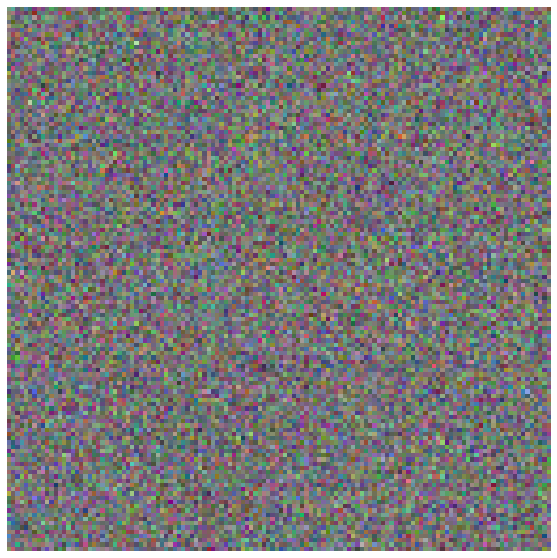

In [50]:
show_tensor_as_image(torch.randn(3,128,128))

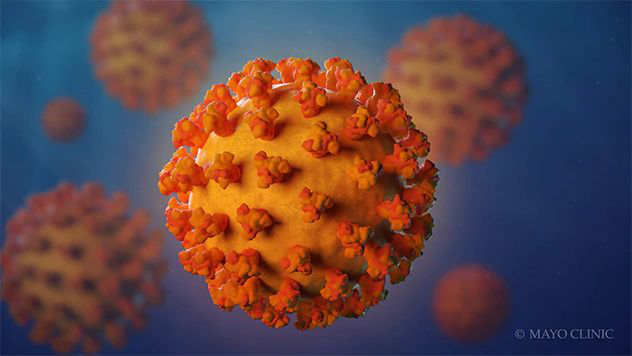

In [60]:
img = Image.open("COVID19.jpg"); img

In [61]:
img_tensor = tv.transforms.ToTensor()(img)

In [62]:
img_tensor.shape

torch.Size([3, 356, 632])

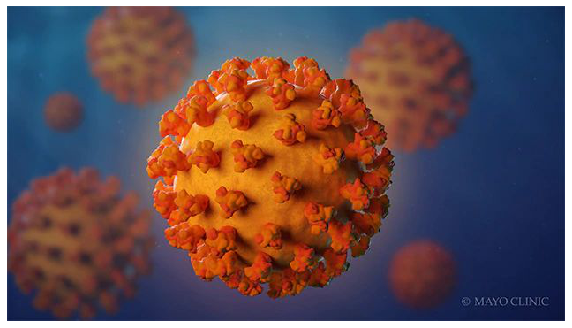

In [63]:
show_tensor_as_image(img_tensor)

### Ejercicios

1. Muestra la imagen cortada a la mitad horizontalmente, dejando la parte de arriba.

2. Muestra la imagen cortada a la mitad verticalmente, dejando la parte derecha.

3. Llena la mitad de la imagen diagonalmente (tú escoge la diagonal) con negro y muestra la imagen.

4. Convierte la imagen a escala de grises (directo con pytorch, obviamente)

5. Encuentra el color promedio de la imagen.

6. Para cada pixel pon como 0 aquellos valores que estén debajo del promedio (de su propio color)

7. Todos los pixeles que sean mayormente azules conviértelos a blanco y negro. Los pixeles mayormente rojos o verdes déjalos como están.

## Optimización numérica

Si tienes derivadas parciales, puedes encontrar mínimos (o máximos) locales fácilmente. Pytorch trae optimizadores que hacen esto por ti.

Por ejemplo, digamos que queremos encontrar un mínimo local de $x^2-10x + 1$ o lo que sea (agregale senos, cosenos, y otras cosas complicadas si quieres hacer algo que no podrías hacer analíticamente). 

In [ ]:
def f(x): 
    return x**2 - 10*x + 1

In [ ]:
x = torch.randn(1)*10

x = x.requires_grad_(True)

In [ ]:
f(x)

In [ ]:
from torch import optim
from tqdm import tqdm

In [ ]:
optimizer = optim.SGD([x], lr=0.01, momentum=0.9)

In [ ]:
num_steps = 1000
for step in tqdm(range(num_steps)):
    optimizer.zero_grad()
    loss = f(x)
    loss.backward()
    optimizer.step()

In [ ]:
x

**Nota**: Pytorch trae una cantidad **masiva** de cosas. pueden verlo en la documentación. Cualquier cosa que quieras hacer, seguro puedes!

- [Tutoriales](https://pytorch.org/tutorials/)
- [Documentación](https://pytorch.org/docs/stable/index.html)